Importing the dependencies

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and processing

In [80]:
calories = pd.read_csv('calories.csv')

In [81]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [82]:
exercise = pd.read_csv('exercise.csv')

In [83]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


#### Combining the two dataframes

In [84]:
calories_data = pd.concat([exercise, calories['Calories']], axis= 1)

In [85]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [86]:
# Checking the no of rows and columns
calories_data.shape

(15000, 9)

In [87]:
# User_ID is of no use so we are dropping it
calories_data.drop(columns= 'User_ID', axis= 1, inplace= True)

In [88]:
calories_data.shape

(15000, 8)

In [89]:
# Getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [90]:
calories_data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [91]:
calories_data['Gender'].head()

0      male
1    female
2      male
3    female
4    female
Name: Gender, dtype: object

In [92]:
calories_data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

Data Analysis

In [93]:
# Getting some statistical measures about the data
calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [94]:
sns.set()

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_7820\213666569.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


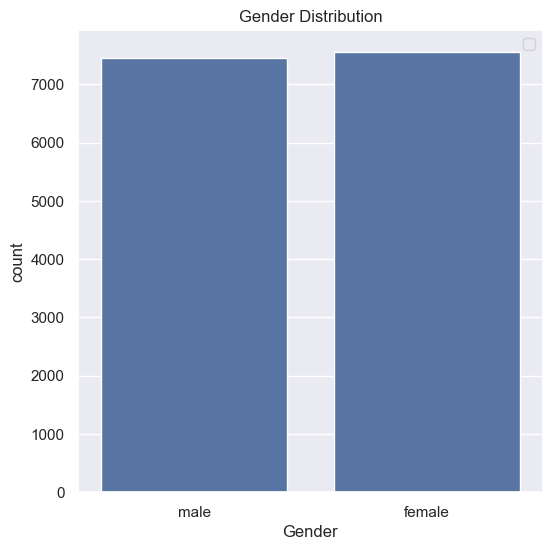

In [95]:
plt.figure(figsize= (6, 6))
sns.countplot(x= 'Gender', data= calories_data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.legend()
plt.show()

In [96]:
dataset = calories_data.drop(columns= ["Calories", "Gender"])

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_7820\2267567973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= calories_data[col])


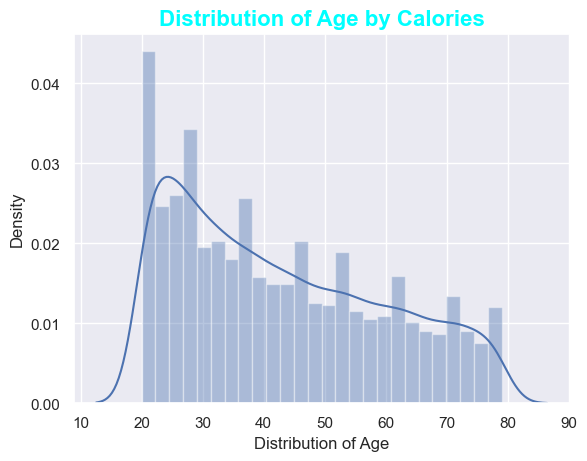

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_7820\2267567973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= calories_data[col])


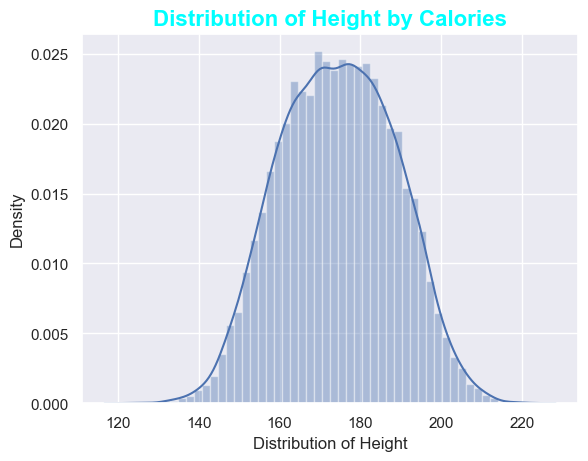

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_7820\2267567973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= calories_data[col])


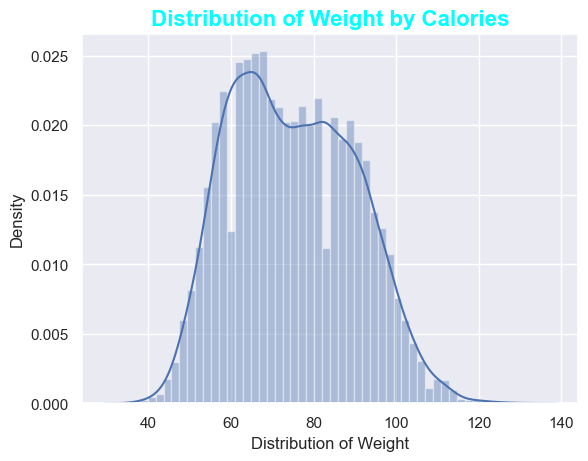

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_7820\2267567973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= calories_data[col])


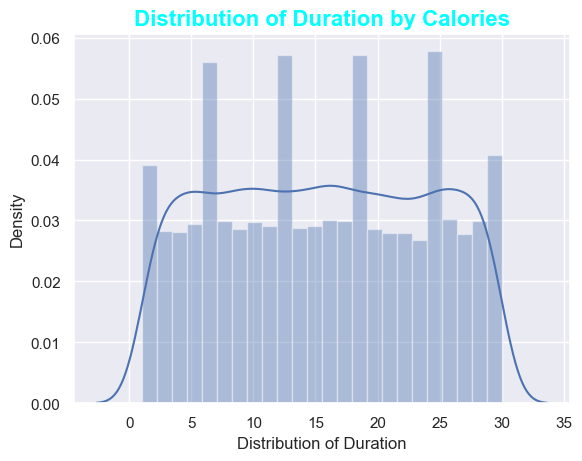

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_7820\2267567973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= calories_data[col])


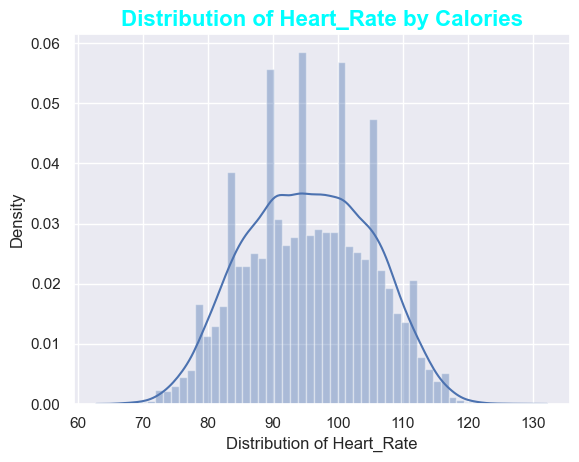

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_7820\2267567973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= calories_data[col])


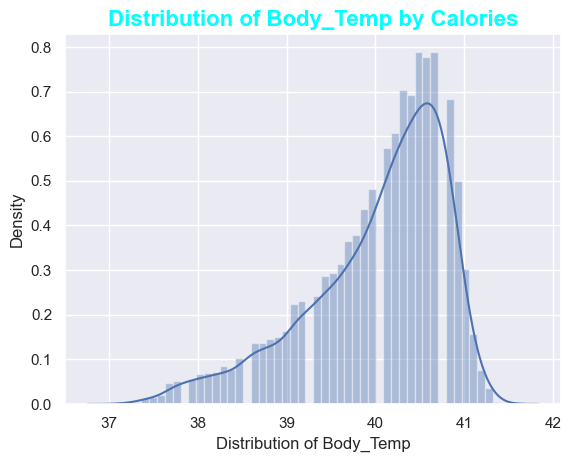

In [97]:
for col in dataset.columns:
    sns.distplot(x= calories_data[col])
    plt.title(f'Distribution of {col} by Calories', fontsize= 16, fontweight= 'bold', color= 'cyan')
    plt.xlabel(f'Distribution of {col}')
    plt.show()

In [98]:
calories_data.replace({'Gender' : {'male' : 0, 'female' : 1}}, inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_7820\1749954312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender' : {'male' : 0, 'female' : 1}}, inplace= True)


Finding correlation in the dataset
- +ve correlation
- -ve correlation


In [99]:
correlation = calories_data.corr()

<Axes: >

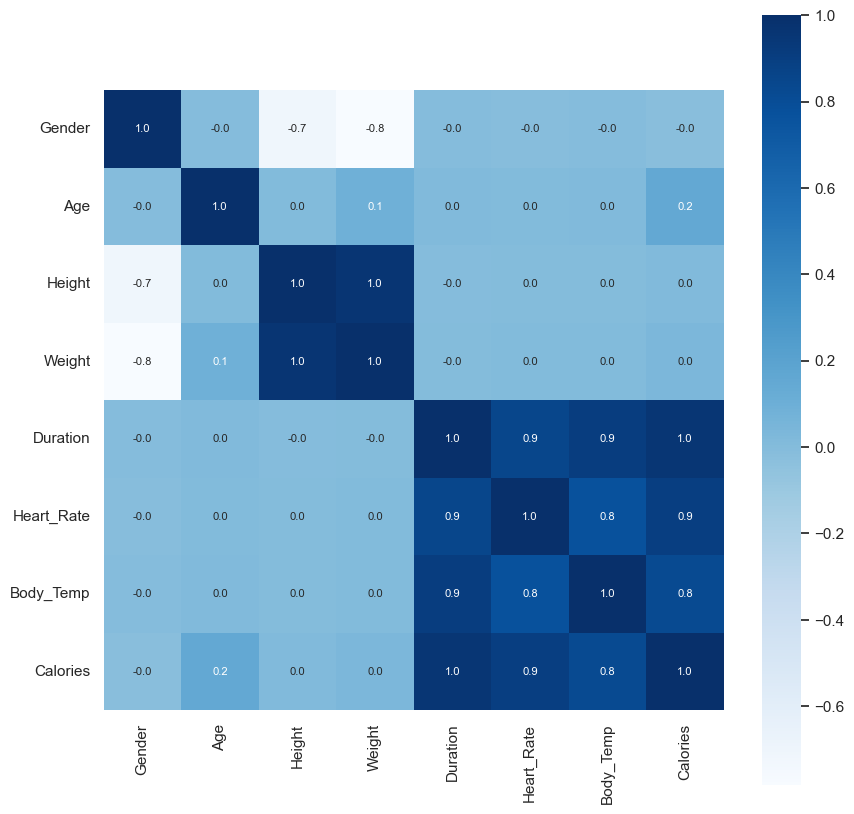

In [100]:
# Constructing the heatmap to understand the correlation
plt.figure(figsize= (10, 10))
sns.heatmap(correlation, cbar= True, square= True, fmt= '.1f', annot= True, annot_kws={'size' : 8}, cmap= 'Blues')

In [101]:
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating the features and the target

In [102]:
X = calories_data.drop(columns= 'Calories', axis= 1)
Y = calories_data['Calories']

In [103]:
X.shape

(15000, 7)

In [104]:
Y.shape

(15000,)

Train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [107]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


Model Training

In [108]:
regressor = XGBRegressor()

In [110]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

In [114]:
# Evaluation on Training Data
training_data_prediction = regressor.predict(X_train)
print(training_data_prediction)

[ 11.680271  36.71814   31.747328 ... 108.05978  179.23735   44.236874]


In [115]:
# Evaluation on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [116]:
mae_training = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error:", mae_training)

Mean Absolute Error: 0.9322033420062313


In [117]:
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean absolute Error:", mae_test)

Mean absolute Error: 1.4833678883314132


Predictive System

In [125]:
input = (0,68,190.0,94.0,29.0,105.0,40.8)
input_as_array = np.asarray(input)
reshaped_array = input_as_array.reshape(1, -1)
prediction = regressor.predict(reshaped_array)
prediction = prediction[0]
print(f'{prediction:.2f} Calories burnt')

236.13 Calories burnt
